In [1]:
def BSM_call_prc(S, K, tau, r, sigma):
    import numpy as np
    import scipy.stats
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    d2 = d1 - sigma * np.sqrt(tau)
    
    return S * scipy.stats.norm.cdf(d1, 0, 1) - K * np.exp(-r * tau) * scipy.stats.norm.cdf(d2, 0, 1)

def BSM_call_delta(S, K, tau, r, sigma):
    import numpy as np
    import scipy.stats
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
    return scipy.stats.norm.cdf(d1, 0, 1)

In [2]:
S0 = 1
mu = 0.05
sigma = 0.2
K = 1.2
r = 0.05
T = 5
N = 1000
dt = T / N

In [3]:
bsm_call_prc0 = BSM_call_prc(S0, K, T, r, sigma)
print(bsm_call_prc0)

0.20578973389573962


In [4]:
import numpy as np

Spath = np.zeros(shape=N+1)
cash = np.zeros(shape=N+1)
port = np.zeros(shape=N+1)
asset = np.zeros(shape=N+1)
error = np.zeros(shape=N+1)
Cpath = np.zeros(shape=N+1)


Spath[0] = S0
cash[0] = 1
asset[0] = BSM_call_delta(S0, K, T, r, sigma)
port[0] = asset[0] * Spath[0] + cash[0]
error[0] = 0
Cpath[0] = bsm_call_prc0


for i in range(1, N+1):
    z = np.random.standard_normal()
    Spath[i] = Spath[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    port[i] = asset[i-1] * Spath[i] + (1 + r * dt) * cash[i-1]
    asset[i] = BSM_call_delta(Spath[i], K, T - i * dt, r, sigma)
    cash[i] = (1 + r * dt) * cash[i-1] + (asset[i-1] - asset[i]) * Spath[i]
    Cpath[i]=BSM_call_prc(Spath[i], K, T - i * dt, r, sigma) 
    error[i] = abs(Cpath[i] - port[i] - (bsm_call_prc0 - port[0]) * np.exp(r * i * dt))
    

<ipython-input-1-ba165bbbac51>:14: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))
<ipython-input-1-ba165bbbac51>:5: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * np.sqrt(tau))


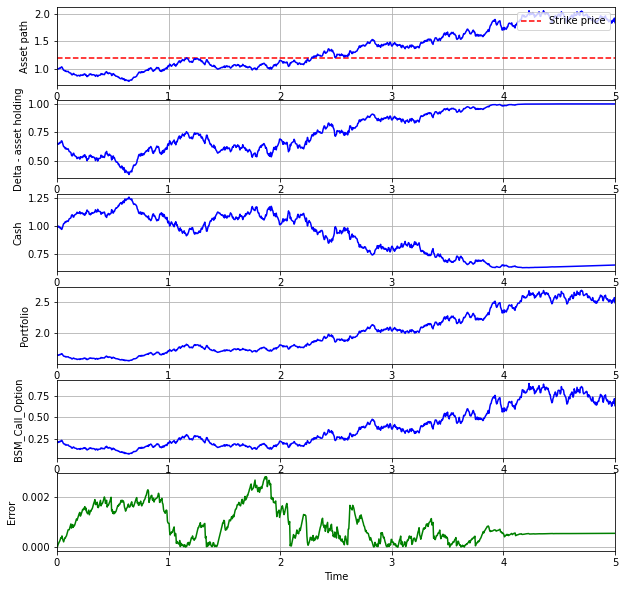

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(611)
plt.plot(np.linspace(0, T, N+1), Spath, color='b')
plt.hlines(y=K, xmin=0, xmax=T, color='r', linestyles='dashed', label='Strike price')
plt.ylabel('Asset path')
plt.grid(True)
plt.xlim((0, T))
plt.legend(loc=1)

plt.subplot(612)
plt.plot(np.linspace(0, T, N+1), asset, color='b')
plt.ylabel('Delta - asset holding')
plt.grid(True)
plt.xlim((0, T))

plt.subplot(613)
plt.plot(np.linspace(0, T, N+1), cash, color='b')
plt.ylabel('Cash')
plt.grid(True)
plt.xlim((0, T))

plt.subplot(614)
plt.plot(np.linspace(0, T, N+1), port, color='b', label='Portfolio value')
plt.ylabel('Portfolio')
plt.grid(True)
plt.xlim((0, T))

plt.subplot(615)
plt.plot(np.linspace(0, T, N+1), Cpath, color='b', label='Portfolio value')
plt.ylabel('BSM_Call_Option')
plt.grid(True)
plt.xlim((0, T))

plt.subplot(616)
plt.plot(np.linspace(0, T, N+1), error, color='g', label='Hedging error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.grid(True)
plt.xlim((0, T))

plt.show()